In [1]:
import pandas as pd
import numpy  as np
import matplotlib
from pyearth import Earth
from pyearth import export
import matplotlib.pyplot as plt 
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')


%matplotlib inline
np.warnings.filterwarnings('ignore')

pd.__version__
# np.__version__
print('matplotlib: {}'. format(matplotlib. __version__))

matplotlib: 3.3.4


In [2]:
# !wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.json

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()  

In [3]:
df4 = spark.read.options(header='True', inferSchema='True', delimiter=';').csv('/home/markn/my_project/corona/COVID-19_casus_landelijk.csv')
df4.show(10)

+-------------------+---------------+--------------------+--------+------+-------------+------------------+--------+-------------+------------------------+
|          Date_file|Date_statistics|Date_statistics_type|Agegroup|   Sex|     Province|Hospital_admission|Deceased|Week_of_death|Municipal_health_service|
+-------------------+---------------+--------------------+--------+------+-------------+------------------+--------+-------------+------------------------+
|2021-03-23 10:00:00|     2020-01-01|                 DOO|   40-49|Female|Noord-Holland|                No|      No|         null|           GGD Amsterdam|
|2021-03-23 10:00:00|     2020-01-01|                 DOO|   50-59|  Male|   Gelderland|                No|      No|         null|    Veiligheids- en G...|
|2021-03-23 10:00:00|     2020-01-01|                 DOO|   20-29|Female| Zuid-Holland|                No|      No|         null|     GGD Hollands-Midden|
|2021-03-23 10:00:00|     2020-01-01|                 DOO|   60-

In [4]:
df4.printSchema()

root
 |-- Date_file: string (nullable = true)
 |-- Date_statistics: string (nullable = true)
 |-- Date_statistics_type: string (nullable = true)
 |-- Agegroup: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Province: string (nullable = true)
 |-- Hospital_admission: string (nullable = true)
 |-- Deceased: string (nullable = true)
 |-- Week_of_death: integer (nullable = true)
 |-- Municipal_health_service: string (nullable = true)



After checking the data set collum we have to know exactly where is the province of Netherlands. 

In [5]:
df4.select("Province").distinct().show(truncate=False)

+-------------+
|Province     |
+-------------+
|Overijssel   |
|Flevoland    |
|Zeeland      |
|Noord-Brabant|
|Fryslân      |
|Noord-Holland|
|Gelderland   |
|Utrecht      |
|Limburg      |
|Drenthe      |
|Zuid-Holland |
|Groningen    |
+-------------+



In [6]:
df = df4.toPandas()
df.head(10)

,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service
0,2021-03-23 10:00:00,2020-01-01,DOO,40-49,Female,Noord-Holland,No,No,NaN,GGD Amsterdam
1,2021-03-23 10:00:00,2020-01-01,DOO,50-59,Male,Gelderland,No,No,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...
2,2021-03-23 10:00:00,2020-01-01,DOO,20-29,Female,Zuid-Holland,No,No,NaN,GGD Hollands-Midden
3,2021-03-23 10:00:00,2020-01-01,DOO,60-69,Female,Noord-Holland,No,No,NaN,GGD Hollands-Noorden
4,2021-03-23 10:00:00,2020-01-04,DOO,10-19,Female,Gelderland,Unknown,No,NaN,GGD Gelderland-Zuid
5,2021-03-23 10:00:00,2020-01-06,DOO,30-39,Male,Limburg,Unknown,Unknown,NaN,GGD Zuid-Limburg
6,2021-03-23 10:00:00,2020-01-16,DOO,0-9,Female,Zuid-Holland,No,No,NaN,GGD Rotterdam-Rijnmond
7,2021-03-23 10:00:00,2020-01-20,DOO,50-59,Female,Gelderland,No,No,NaN,GGD Gelderland-Zuid
8,2021-03-23 10:00:00,2020-01-20,DOO,0-9,Male,Gelderland,No,No,NaN,GGD Gelderland-Zuid
9,2021-03-23 10:00:00,2020-01-22,DOO,80-89,Female,Zuid-Holland,Unknown,Unknown,NaN,GGD Hollands-Midden


In [7]:
# df = pd.read_csv('/home/markn/my_project/corona/COVID-19_casus_landelijk.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
# df.info()
# from pandas.compat import StringIO

# df = pd.read_csv(StringIO(df1), parse_dates=[0, 1])

# df1.info()
df['Date_file'] = df['Date_file'].astype('datetime64[ns]')
df['Date_statistics'] = df['Date_statistics'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213366 entries, 0 to 1213365
Data columns (total 10 columns):
Date_file                   1213366 non-null datetime64[ns]
Date_statistics             1213366 non-null datetime64[ns]
Date_statistics_type        1213366 non-null object
Agegroup                    1213366 non-null object
Sex                         1213366 non-null object
Province                    1213366 non-null object
Hospital_admission          1213366 non-null object
Deceased                    1213366 non-null object
Week_of_death               16338 non-null float64
Municipal_health_service    1213366 non-null object
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 92.6+ MB


In [8]:
df.count()

Date_file                   1213366
Date_statistics             1213366
Date_statistics_type        1213366
Agegroup                    1213366
Sex                         1213366
Province                    1213366
Hospital_admission          1213366
Deceased                    1213366
Week_of_death                 16338
Municipal_health_service    1213366
dtype: int64

In [9]:
daterep = 'Date_statistics'
region  = 'Municipal_health_service'
cases   = 'cases'
deaths  = 'Deceased'
#we assign the difference collums for date,
lastdate = df[daterep].max() - pd.Timedelta('7 days')

df[cases]  = 1
df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df



,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service,cases
0,2021-03-23 10:00:00,2020-01-01,DOO,40-49,Female,Noord-Holland,No,0,NaN,GGD Amsterdam,1
1,2021-03-23 10:00:00,2020-01-01,DOO,50-59,Male,Gelderland,No,0,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...,1
2,2021-03-23 10:00:00,2020-01-01,DOO,20-29,Female,Zuid-Holland,No,0,NaN,GGD Hollands-Midden,1
3,2021-03-23 10:00:00,2020-01-01,DOO,60-69,Female,Noord-Holland,No,0,NaN,GGD Hollands-Noorden,1
4,2021-03-23 10:00:00,2020-01-04,DOO,10-19,Female,Gelderland,Unknown,0,NaN,GGD Gelderland-Zuid,1
5,2021-03-23 10:00:00,2020-01-06,DOO,30-39,Male,Limburg,Unknown,0,NaN,GGD Zuid-Limburg,1
6,2021-03-23 10:00:00,2020-01-16,DOO,0-9,Female,Zuid-Holland,No,0,NaN,GGD Rotterdam-Rijnmond,1
7,2021-03-23 10:00:00,2020-01-20,DOO,50-59,Female,Gelderland,No,0,NaN,GGD Gelderland-Zuid,1
8,2021-03-23 10:00:00,2020-01-20,DOO,0-9,Male,Gelderland,No,0,NaN,GGD Gelderland-Zuid,1
9,2021-03-23 10:00:00,2020-01-22,DOO,80-89,Female,Zuid-Holland,Unknown,0,NaN,GGD Hollands-Midden,1


In [10]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo['cases']

Municipal_health_service,Dienst Gezondheid & Jeugd ZHZ,GGD Amsterdam,GGD Brabant-Zuidoost,GGD Drenthe,GGD Flevoland,GGD Fryslân,GGD Gelderland-Zuid,GGD Gooi en Vechtstreek,GGD Groningen,GGD Haaglanden,...,GGD Limburg-Noord,GGD Noord- en Oost-Gelderland,GGD Regio Twente,GGD Regio Utrecht,GGD Rotterdam-Rijnmond,GGD West-Brabant,GGD Zaanstreek/Waterland,GGD Zeeland,GGD Zuid-Limburg,Veiligheids- en Gezondheidsregio Gelderland-Midden
Date_statistics,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                \
Municipal_health_service Dienst Gezondheid & Jeugd ZHZ GGD Amsterdam   
2020-01-01                                         0.0           0.0   
2020-01-02                                         NaN           NaN   
2020-01-03                                         NaN           NaN   
2020-01-04                                         0.0           0.0   
2020-01-05                                         NaN           NaN   
2020-01-06                                         0.0           0.0   
2020-01-07                                         NaN           NaN   
2020-01-08                                         NaN           NaN   
2020-01-09                                         NaN           NaN   
2020-01-10                                         NaN           NaN   
2020-01-11                                         NaN           NaN   
2020-01-12                                         NaN           NaN   
2020-01-13                                         NaN           NaN   
2020-01-14                                         NaN           NaN   
2020-01-15                                         NaN           NaN   
2020-01-16                                         0.0           0.0   
2020-01-17                                         NaN           NaN   
2020-01-18                                         NaN           NaN   
2020-01-19                                         NaN           NaN   
2020-01-20                                         0.0           0.0   
2020-01-21                                         NaN           NaN   
2020-01-22                                         0.0           0.0   
2020-01-23                                         NaN           NaN   
2020-01-24                                         0.0           0.0   
2020-01-25                                         0.0           0.0   
2020-01-26                                         0.0           0.0   
2020-01-27                                         0.0           0.0   
2020-01-28                                         NaN           NaN   
2020-01-29                                         0.0           0.0   
2020-01-30                                         NaN           NaN   
...                                                ...           ...   
2022-02-22                                         NaN           NaN   
2022-02-23                                         NaN           NaN   
2022-02-24                                         NaN           NaN   
2022-02-25                                         NaN           NaN   
2022-02-26                                         NaN           NaN   
2022-02-27                                         NaN           NaN   
2022-02-28                                         NaN           NaN   
2022-03-01                                         NaN           NaN   
2022-03-02                                         NaN           NaN   
2022-03-03                                         NaN           NaN   
2022-03-04                                         NaN           NaN   
2022-03-05                                         NaN           NaN   
2022-03-06                                         NaN           NaN   
2022-03-07                                         NaN           NaN   
2022-03-08                                         NaN           NaN   
2022-03-09                                         NaN           NaN   
2022-03-10                                         NaN           NaN   
2022-03-11                                         NaN           NaN   
2022-03-12                                         NaN           NaN   
2022-03-13                                         NaN           NaN   
2022-03-14                                         NaN           NaN   
2022-03-15                                         NaN           NaN   
2022-03-16                                         NaN           NaN   
2022-03-17    

In [12]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    813.000000
mean     406.000000
std      234.837178
min        0.000000
25%      203.000000
50%      406.000000
75%      609.000000
max      812.000000
Name: daynum, dtype: float64

In [13]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [14]:
import matplotlib as mpl

mpl.rc('figure', max_open_warning = 0)


In [15]:
regions = np.sort(df[region].unique())
ind_pos = [2,1,4,8]
regions1 = regions[ind_pos]
regions1

array(['GGD Brabant-Zuidoost', 'GGD Amsterdam', 'GGD Flevoland',
       'GGD Groningen'], dtype=object)

Running multiple wave analysis for 'GGD Brabant-Zuidoost'
Minimum number of cases is 2
Wave 01 beta  7.919 mu  69 fit 0.927 peak 2020-03-10 from 2020-02-27 to 2020-04-07 size 259
Wave 02 beta  6.819 mu  78 fit 0.864 peak 2020-03-19 from 2020-03-06 to 2020-04-20 size 773
Wave 03 beta  7.417 mu  90 fit 0.874 peak 2020-03-31 from 2020-03-17 to 2020-05-05 size 865
Wave 04 beta  8.746 mu 105 fit 0.821 peak 2020-04-15 from 2020-03-31 to 2020-05-24 size 682
Wave 05 beta  3.353 mu 123 fit 0.812 peak 2020-05-03 from 2020-04-29 to 2020-05-11 size 33
Wave 06 beta  4.451 mu 135 fit 0.697 peak 2020-05-15 from 2020-05-10 to 2020-05-27 size 58
Wave 07 beta  8.234 mu 154 fit 0.868 peak 2020-06-03 from 2020-05-21 to 2020-06-30 size 218
Wave 08 beta  3.750 mu 166 fit 0.652 peak 2020-06-15 from 2020-06-11 to 2020-06-24 size 41
Wave 09 beta  4.944 mu 197 fit 0.854 peak 2020-07-16 from 2020-07-10 to 2020-07-27 size 46
Wave 10 beta 11.598 mu 220 fit 0.821 peak 2020-08-08 from 2020-07-21 to 2020-09-18 size 3

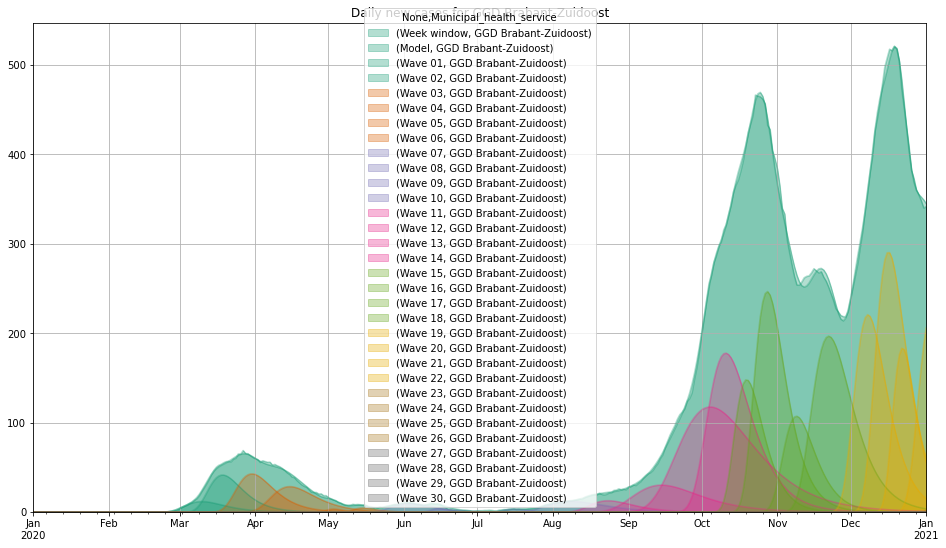

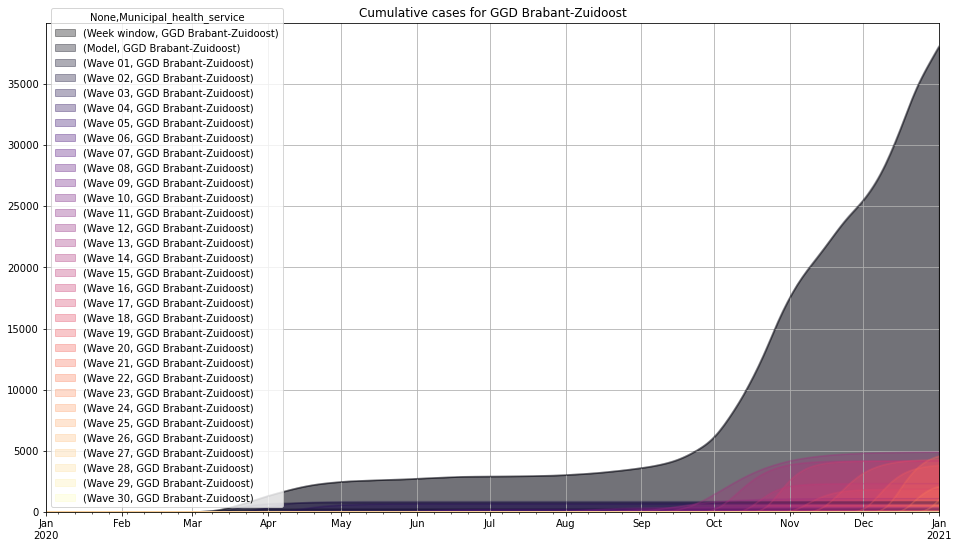

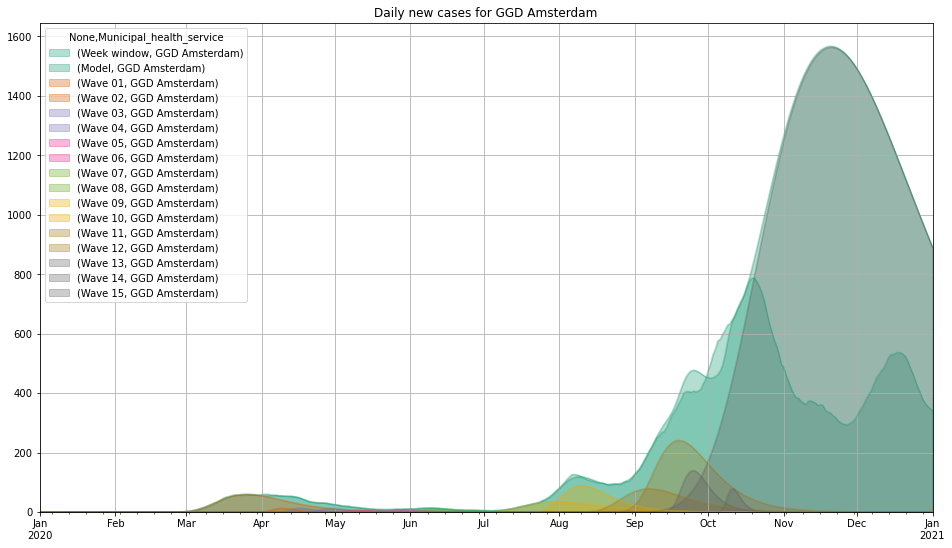

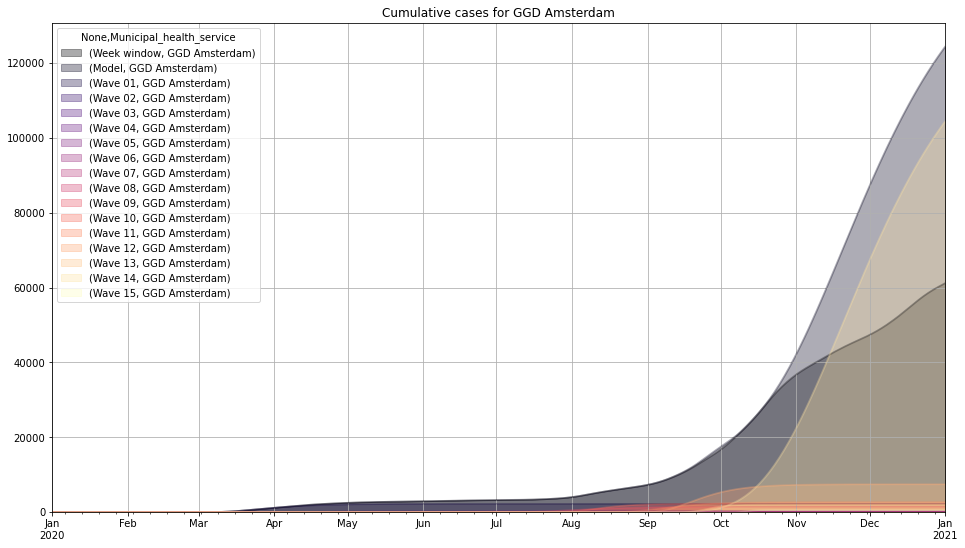

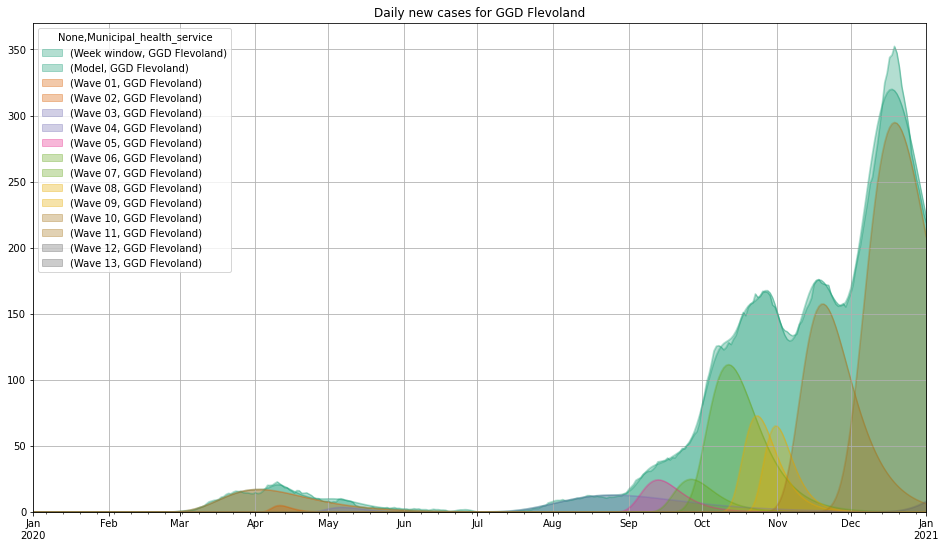

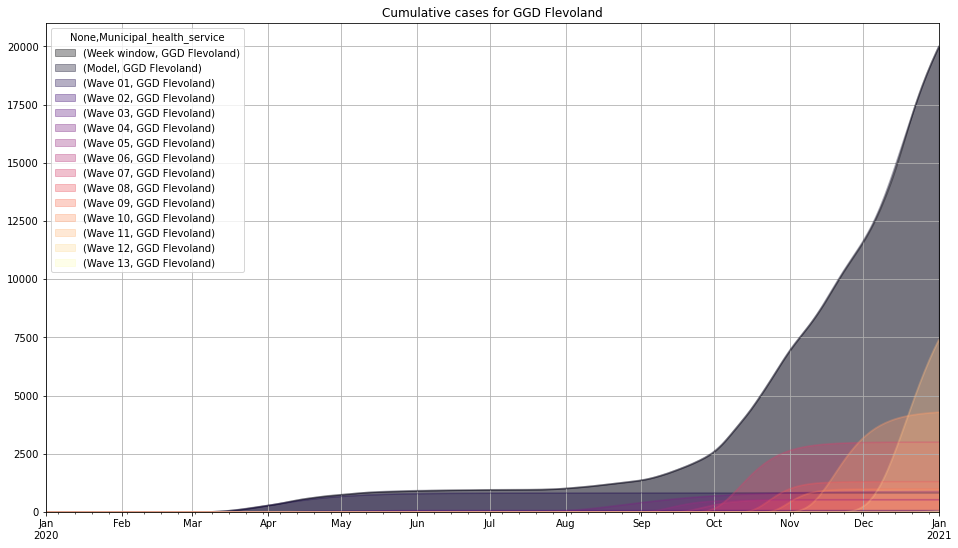

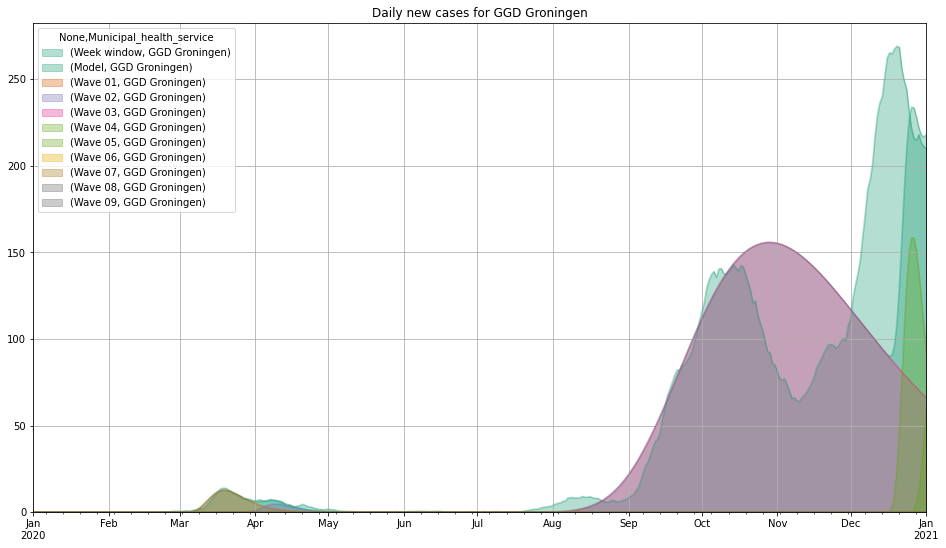

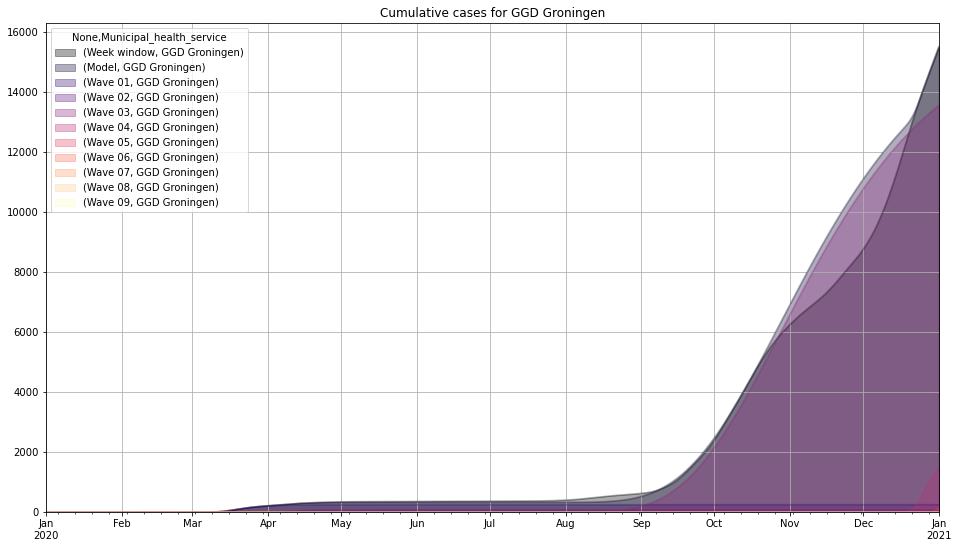

In [16]:
# Select regions to fit.
regions = regions1

# Choose whether to output plots per region.
showplots = True

# region  = 'GGD Brabant Zuid-Oost' and some order important area, i think this is good to choose Brabant-Zuid-Oost
# We will try to measure the case which going up and down and idenfity where 
measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted wave
wmeasure = 'Wave '       # waves
### This one i made the measure for case and week windown to show the smoothed, remaining, ... of corona ware. 
for region in regions:
### build the region in region. 
    wave = 1
###Apply the variable 
    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))
## Show the line of wave analysis, i got help as reference from outsite. 
    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})

        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -0.5) &
                          (df_pred['linear'] > -3.5)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break
### Luckly not so much data left, it already good data occurrence per day. 
        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)
## Day min is the minumum date function min() help us choose the day. 
## Day max is the max date function max() help us choose the top day. 
        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
    #In df_pred['linear'] is suitable more on the graph. You can see the gradient too. 
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)
## Apply export python_function(eamodel)
        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -1/77) &
                           (df_knot['daysdata'] >= 3))

        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)
### Slope does matter because they are more linear regression in here. 
        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final
### Findcv 
### Final.std() it is the goal to know cv of standarize / final. 
        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()
### Beta wave and MU wave fit the peak from difference size. 
### I assigned the wave, mu, betta to reac the beak of start date. 
        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))

        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1

    if showplots:
        df_geo[plotlist].loc['20200101':'20210101'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+region, 
            colormap="Dark2")

        df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+region, 
            colormap="magma")



Show the case per week. 

In [17]:
# !wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

In [18]:
import pandas as pd
import numpy  as np

df_case = pd.read_csv(
    'COVID-19_casus_landelijk.csv',
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True)

df_case.tail(10)
## input by pandas
# df_case_spark = spark.read.options(header='True', inferSchema='True', delimiter=';').csv('COVID-19_casus_landelijk.csv')
# # df_case_spark.show(10)
# from pyspark.sql.types import *

# df_case_spark = df_case_spark.withColumn("Date_file",
# df_case_spark["Date_file"].cast(DateType()))

# df_case_spark = df_case_spark.withColumn("Date_statistics",
# df_case_spark["Date_statistics"].cast(DateType()))
df_case.info()
# df_case_spark.printSchema()
## As a big data input by spark

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236209 entries, 0 to 1236208
Data columns (total 10 columns):
Date_file                   1236209 non-null datetime64[ns]
Date_statistics             1236209 non-null datetime64[ns]
Date_statistics_type        1236209 non-null object
Agegroup                    1236209 non-null object
Sex                         1236209 non-null object
Province                    1236209 non-null object
Hospital_admission          1236209 non-null object
Deceased                    1236209 non-null object
Week_of_death               16420 non-null float64
Municipal_health_service    1236209 non-null object
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 94.3+ MB


In [19]:
# df_case['period'] = df_case['Date_statistics'].apply(lambda x: x.isocalendar()[1])* 100 + apply(lambda x: x.isocalendar()[1])
# df_case['period']
df_case['period'] = df_case['Date_statistics'].apply(lambda x: x.isocalendar()[0])* 100 + df_case['Date_statistics'].apply(lambda x: x.isocalendar()[1])
df_case['period'] = df_case['period'].apply(str)
df_case['period'] = df_case['period'].apply(lambda x: x[: 4] + 'W' + x[4:])

df_case['group'] = df_case['Sex'] + ' ' + df_case['Agegroup']

df_case.tail(10)

,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service,period,group
1236199,2021-03-26 10:00:00,2021-03-26,DPL,0-9,Male,Zuid-Holland,Unknown,Unknown,NaN,Dienst Gezondheid & Jeugd ZHZ,2021W12,Male 0-9
1236200,2021-03-26 10:00:00,2021-03-26,DPL,20-29,Male,Fryslân,Unknown,Unknown,NaN,GGD Groningen,2021W12,Male 20-29
1236201,2021-03-26 10:00:00,2021-03-26,DON,20-29,Male,Zuid-Holland,Unknown,Unknown,NaN,GGD Haaglanden,2021W12,Male 20-29
1236202,2021-03-26 10:00:00,2021-03-26,DPL,60-69,Male,Gelderland,Unknown,Unknown,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...,2021W12,Male 60-69
1236203,2021-03-26 10:00:00,2021-03-26,DPL,50-59,Female,Gelderland,Unknown,Unknown,NaN,GGD Noord- en Oost-Gelderland,2021W12,Female 50-59
1236204,2021-03-26 10:00:00,2021-03-26,DON,30-39,Female,Gelderland,Unknown,Unknown,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...,2021W12,Female 30-39
1236205,2021-03-26 10:00:00,2021-03-26,DPL,40-49,Male,Noord-Holland,Unknown,Unknown,NaN,GGD Amsterdam,2021W12,Male 40-49
1236206,2021-03-26 10:00:00,2021-03-26,DPL,80-89,Male,Zuid-Holland,Unknown,Unknown,NaN,GGD Hollands-Midden,2021W12,Male 80-89
1236207,2021-03-26 10:00:00,2021-03-26,DPL,60-69,Male,Zuid-Holland,Unknown,Unknown,NaN,GGD Rotterdam-Rijnmond,2021W12,Male 60-69
1236208,2021-03-26 10:00:00,2021-03-26,DPL,20-29,Female,Gelderland,Unknown,Unknown,NaN,GGD Noord- en Oost-Gelderland,2021W12,Female 20-29


In [20]:
df_heat = df_case[df_case['Municipal_health_service'] != ''].pivot_table(
    index='period', 
    columns='group', 
    values='Date_statistics', 
    aggfunc='count').fillna(0)

# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = df_heat[df_heat.columns[0:24]].sum(axis=1)
df_heat = df_heat[df_heat.columns[0:24]]

# setting on the relatie growth numbers
# df_heat = df_heat / df_heat.shift() 

df_heat.tail(5).loc[::-1].transpose() 

period,2021W12,2021W11,2021W10,2021W09,2021W08
group,,,,,
Female 0-9,696.0,1602.0,1466.0,1170.0,1050.0
Female 10-19,1382.0,3366.0,2882.0,2246.0,2077.0
Female 20-29,1411.0,3676.0,3346.0,2940.0,2581.0
Female 30-39,1250.0,3415.0,3129.0,2532.0,2431.0
Female 40-49,1248.0,3370.0,3040.0,2406.0,2252.0
Female 50-59,1167.0,3216.0,3122.0,2577.0,2367.0
Female 60-69,582.0,1755.0,1740.0,1376.0,1437.0
Female 70-79,381.0,1034.0,975.0,818.0,877.0
Female 80-89,142.0,354.0,439.0,421.0,548.0


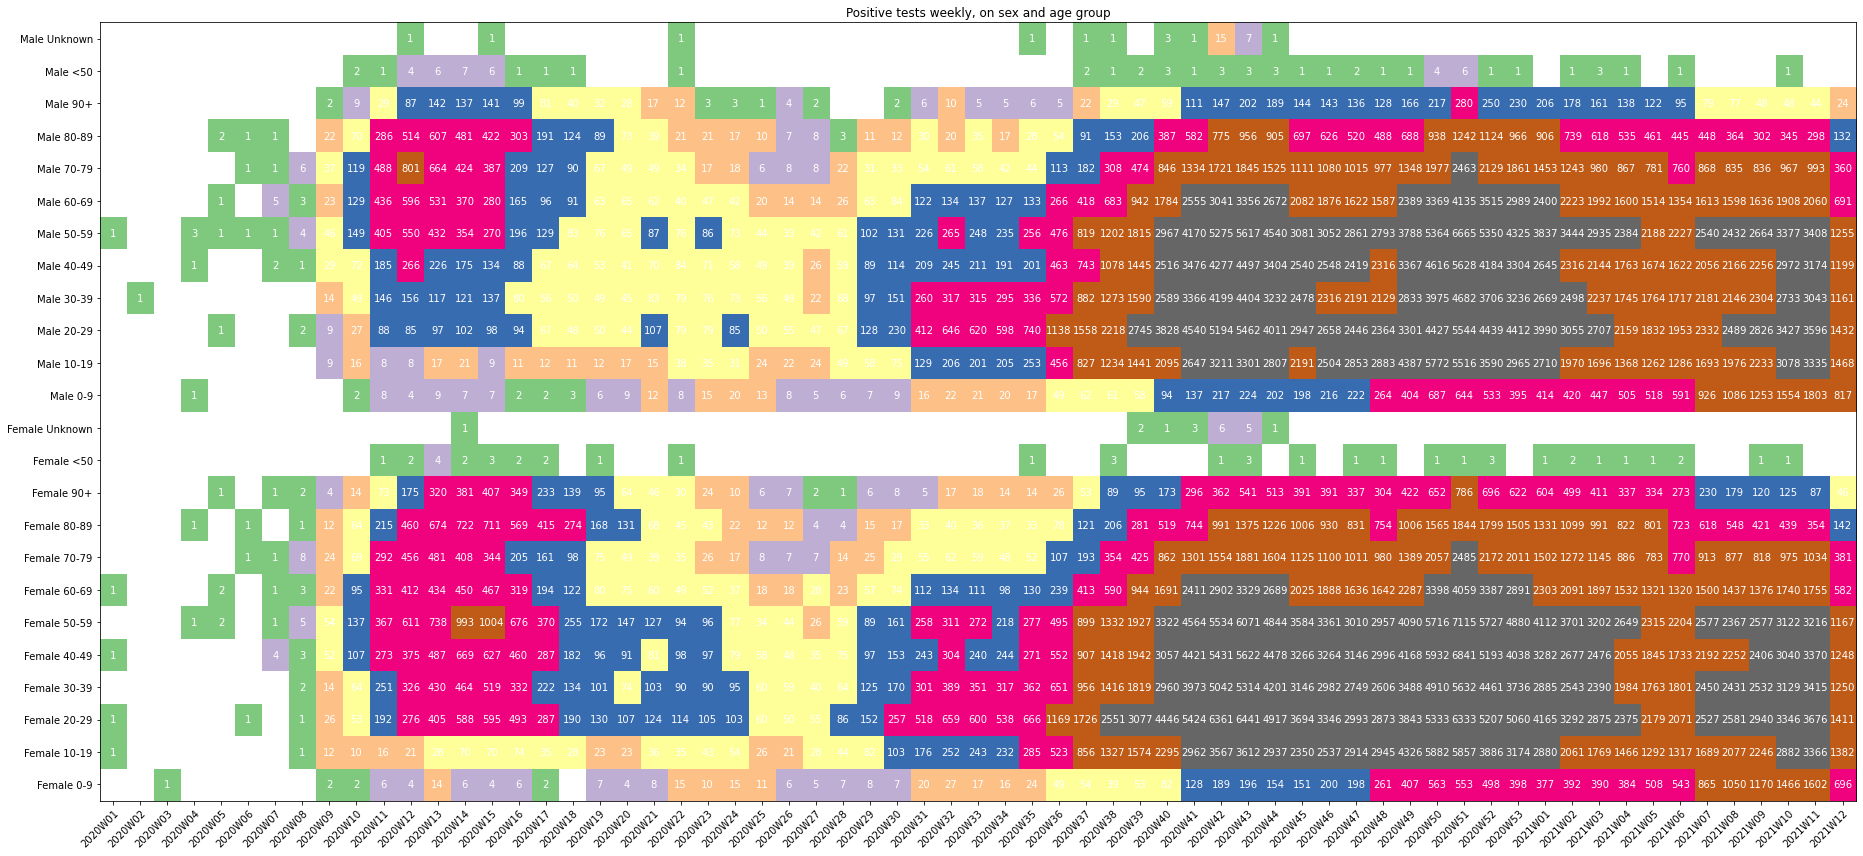

In [21]:
## Define array of row and columns headers 
periods = df_heat.index 
agegroups = df_heat.columns 

## Output size to modified with data size and length 
fig, ax = plt.subplots(figsize=(26,12))

heatmap = plt.imshow(
    np.log(df_heat[df_heat > 0].loc[:].transpose()), 
    cmap='Accent', 
    interpolation='None', 
    aspect='auto', 
    origin='lower')

# Value add to be axis tick label
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right", 
    rotation_mode="anchor")

# Convert dataframe to numpy dataframe
np_heat = df_heat.to_numpy() 

# Set numbers as text labeles 
for i in range(len(periods)): 
    for j in range(len(agegroups)): 
        text = ax.text(
            i, 
            j, 
            int(np_heat[i, j]), 
            ha="center", 
            va="center", 
            color="w")
            
ax.set_title("Positive tests weekly, on sex and age group")
fig.tight_layout() 
plt.show() 

The